# Clustering de documents

## Imports

In [5]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [6]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mbaz0012\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mbaz0012\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
data_path = "../data/txt/"

## Choisir une décennie

In [8]:
DECADE = '1950'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [ ]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
#decade-1: nos queda entonces 195x, entonces vamos a buscar todos los articulos de cette décennie

In [10]:
# Exemple de fichiers
files[:5]

['KB_JB421_1950-04-15_01-00004.txt',
 'KB_JB572_1950-06-07_01-00004.txt',
 'KB_JB773_1950-07-22_01-00010.txt',
 'KB_JB837_1950-12-01_01-00007.txt',
 'KB_JB838_1950-01-06_01-00002.txt']

In [11]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [12]:
# Exemple de textes
texts[0][:400]

"L'AVENIR DU LUXEMBOURG Samedi 15 avri j 350, \nMORHET \nSoirée dramatique \n1 Le cercle dramatique Sainte-Cécile \nde Morhet reprendra, ce dimanche 16 \navril ^Quasimodo), sa brillante soirée \nqui a remporté un succès si remarqua-\n| bie le 10 mars dernier. \ni Rappelons ie programme : \n; 1) ouverture : « Brabançonne »,par \n• la Fantare ; 2) « La .bohème », chœur \nà 2 voix exécuté par JV^.es Renée Cara, "

## Vectoriser les documents à l'aide de TF-IDF

In [13]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [14]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [15]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\mbaz0012\TAC_test\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Détail de la matrice
tfidf_vectors
#ici 1004x3491, 1004 articulos y 3491 palabras

<1004x3491 sparse matrix of type '<class 'numpy.float64'>'
	with 704357 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [33]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

s'est       0.202510
mlle        0.190575
foire       0.184380
roi         0.172903
avril       0.164637
              ...   
effets      0.000000
efficace    0.000000
effort      0.000000
eglise      0.000000
♦           0.000000
Length: 3491, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [18]:
cosine([1, 2, 3], [1, 2, 3])

0

In [19]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [20]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [21]:
tfidf_array = tfidf_vectors.toarray()

In [22]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.03022702, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [23]:
# Vecteur du document 1
tfidf_array[1]

array([0.       , 0.0157552, 0.       , ..., 0.       , 0.       ,
       0.       ])

In [24]:
cosine(tfidf_array[0], tfidf_array[1])

0.7883657407543112

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [ ]:
N_CLUSTERS = 3
#arrancamos con 5 y después testeamos con 3 que parece ser más coherentes, más homogeneo

### Instancier le modèle K-Means et ses arguments

In [26]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [27]:
clusters = km_model.fit_predict(tfidf_vectors)

In [28]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [ ]:
pprint(dict(clustering)[1])
#si pongo el índice 1, la lista que me devuelve son los textos del cluster 2

['KB_JB838_1950-01-08_01-00011.txt',
 'KB_JB838_1950-03-29_01-00008.txt',
 'KB_JB838_1950-04-21_01-00010.txt',
 'KB_JB838_1950-05-20_01-00016.txt',
 'KB_JB838_1950-06-04_01-00012.txt',
 'KB_JB838_1950-06-24_01-00011.txt',
 'KB_JB838_1950-06-25_01-00013.txt',
 'KB_JB838_1950-07-08_01-00009.txt',
 'KB_JB838_1950-07-20_01-00010.txt',
 'KB_JB838_1950-10-15_01-00016.txt',
 'KB_JB838_1950-11-04_01-00012.txt',
 'KB_JB838_1950-11-09_01-00012.txt',
 'KB_JB838_1950-12-14_01-00011.txt',
 'KB_JB838_1951-01-04_01-00009.txt',
 'KB_JB838_1951-01-13_01-00012.txt',
 'KB_JB838_1951-01-23_01-00009.txt',
 'KB_JB838_1951-01-25_01-00010.txt',
 'KB_JB838_1951-02-03_01-00013.txt',
 'KB_JB838_1951-02-14_01-00009.txt',
 'KB_JB838_1951-02-24_01-00011.txt',
 'KB_JB838_1951-03-06_01-00010.txt',
 'KB_JB838_1951-04-11_01-00010.txt',
 'KB_JB838_1951-05-13_01-00015.txt',
 'KB_JB838_1951-05-24_01-00009.txt',
 'KB_JB838_1951-05-26_01-00011.txt',
 'KB_JB838_1951-05-27_01-00016.txt',
 'KB_JB838_1951-05-31_01-00010.txt',
 

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [ ]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())
#el algo reduce de 3000 y pico de dimensiones a dos dimensiones, para que sea comprensible para nosotros humanos y que sea fácil de visualizar

In [31]:
reduced_vectors[:10]

array([[-0.27171117,  0.07653024],
       [-0.20463913,  0.00851998],
       [ 0.04084705, -0.19640061],
       [-0.17032487,  0.02275594],
       [-0.32535487,  0.11428671],
       [ 0.1147517 , -0.30373706],
       [ 0.44430418, -0.25189064],
       [-0.238258  , -0.03785557],
       [-0.05127705, -0.10503288],
       [ 0.61343177,  0.50428418]])

### Générer le plot

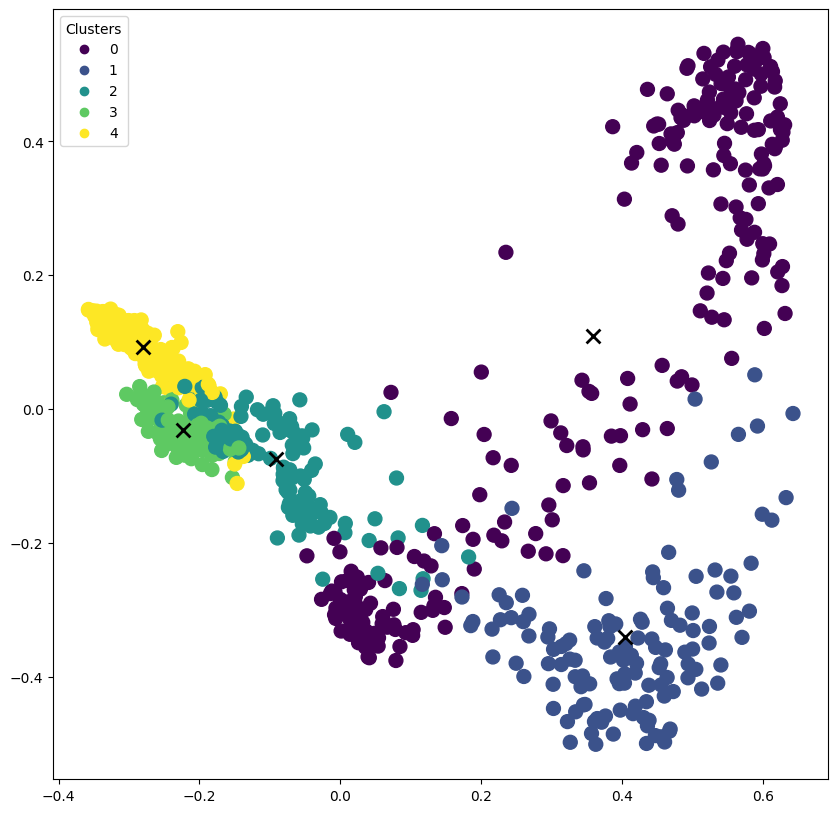

In [32]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")